In [1]:
import pandas as pd
import seaborn as sns
import random as rd
import numpy as np
import cmath as c
import statistics as st
import matplotlib.pyplot as plt
import time
numbers_csv=pd.read_csv("Liczby.csv")

In [53]:
def shuffle(list1):
    list = rd.sample(list1, len(list1))
    return list


def maxImin( list, kon):
    # list = rd.sample(list1, len(list1))
    maxlist = [[] for _ in range(kon-1)]
    minList = [[] for _ in range(kon-1)]
    for i in range(kon-1):
        if isinstance(list[0][i], (int, float)):
            maxlist[i].append(list[0][i])
            minList[i].append(list[0][i])

    for i in range(len(list)):
            for j in range(kon-1):
                if isinstance(list[i][j], (int, float)):
                    
                    
                    if list[i][j] > maxlist[j][-1]:
                        maxlist[j][-1] = list[i][j]
                    if list[i][j] < minList[j][-1]:
                        minList[j][-1] = list[i][j]
    
    for i in range(len(list)):
            for j in range(kon-1):
                if isinstance(list[i][j], (int, float)):
                    if maxlist[j][-1] != minList[j][-1]:
                        list[i][j] = (list[i][j] - minList[j][-1]) / (maxlist[j][-1] - minList[j][-1])
                    else:
                        list[i][j] = 0  
                #print (list[i][j])
    # print(list)
    return(list) 


def knn(tabPos,tabOdw,tabOdl,cz1,cz2,k,pozycjaNAzwy,ile,ilePraw,ilenie):
    
    for i in range(ile):
        x=tabOdl.index(tabPos[i]) 
        tabOdw[k].append(cz1[x][pozycjaNAzwy])     
    licznik = {}
#gLosowanie
    for element in tabOdw[k]:
        li=element.astype(str)
        if li in licznik:
             licznik[li] += 1
        else:
             licznik[li] = str(tabOdw[k]).count(li)
    maks=0
    # remis=False
    najel=""
    tab=[]
 
    # zliczanie głosów
    for element in licznik:
        if int(licznik[element])>int(maks):
            najel=element
    tab.append(najel)
    licz=0
    # zapobieganie remisowi
    for element in licznik:
        if int(licznik[element])==int(maks):
            licz+=1
            if licz>1:
                tab.append(element)     
    # print(najel)    
    najel=rd.choice(tab)   
    # testowanie
    # print(najel,"dupa")
    # print(str(cz2[k][pozycjaNAzwy]),"==")
    if najel==str(cz2[k][pozycjaNAzwy]):
        ilePraw+=1;     
        # print(ilePraw)
    else:
        ilenie+=1 
    # print(ilePraw/(ilenie+ilePraw))        
    return (ilePraw,ilenie)
def krytMinkowski(normList,m,ile,pozycjaNAzwy):
    ilePraw=0
    ilenie=0
    lng=len(normList)
    lng1=round(lng*0.7)
    lng2=lng-lng1
    cz1=normList[:lng1]
    cz2=normList[lng1:]
    # print(cz1)
    tabOdl=[[] for _ in range(len(cz1))]
    tabPos=[[] for _ in range(len(cz1))]
    tabOdw=[[] for _ in range(len(cz1))]
    lng2=len(cz2)-1
    for k in range(lng2):
        # print(k)
        for i in range(len(cz1)):
            sum=0
            for j in range(len(cz1[0])):
                
                if isinstance(cz1[i][j], (int, float)):
                    a=cz1[i][j]
                    # print("cz1 ",cz1[i][j])
                    
                    b=cz2[k][j]
                    # print("a= ",float(a))
                    # print("b= ",float(b))
                    sum+=abs(cz1[i][j]-cz2[k][j])**m

                    # print("huj",sum)
            sum=sum**(1.0/m)
            # print(sum)
            # sum=np.power(sum,1.0/m)
            
            tabOdl[i]=sum
            tabPos[i]=sum

        #koniec minkowskiego    
        # print(tabOdl)
        # print(len(tabOdl))
        tabPos.sort()
        # print(tabPos[1])
        ilePraw, ilenie=knn(tabPos,tabOdw,tabOdl,cz1,cz2,k,pozycjaNAzwy,ile,ilePraw,ilenie)
    return (ilePraw/(ilenie+ilePraw))

In [54]:
df_num=pd.read_csv("Liczby.csv")
lst1=[]

csv1=open("Wynki.csv","w+")
i=0
for i in range(len(df_num)-1):
    lst=df_num.loc[i]

    lst1.append(lst)
lst2=[]
# print(lst1)

 




ln=len(lst1[0]) 
print(lst1[0][0])
lsta=maxImin(lst1,ln) 
lsta=shuffle(lsta) 
nr=2
k=3
# print(lsta[0])
print("a")
csv1.write("k,m,wart\n")
for i in range(1,5):
    lsta=shuffle(lsta) 
    
    for k in range(1,5):
        for nr in range(1,5):
            wrt=krytMinkowski(lsta,nr,3,ln-1)
            print(f"wrt={wrt},k={k},m={nr}\n")
            zm=f"{k},"+f"{nr},"+f"{wrt}"
            print(zm)
            csv1.write(str(k))
            csv1.write(",")
            csv1.write(str(nr))
            csv1.write(",")
            csv1.write(str(wrt))
            csv1.write("\n")
            
            
            

0
a


In [41]:
#https://www.kaggle.com/code/hosammhmdali/digit-recognizer-cnn-98-25-accuracy to jest o cnn - convolution neural network

df_num=numbers_csv.copy()

#labels = csv.pop('label')
#labels.head()

0 ilość:  5923
1 ilość:  6742
2 ilość:  5958
3 ilość:  6131
4 ilość:  5842
5 ilość:  5421
6 ilość:  5918
7 ilość:  6265
8 ilość:  5851
9 ilość:  5949


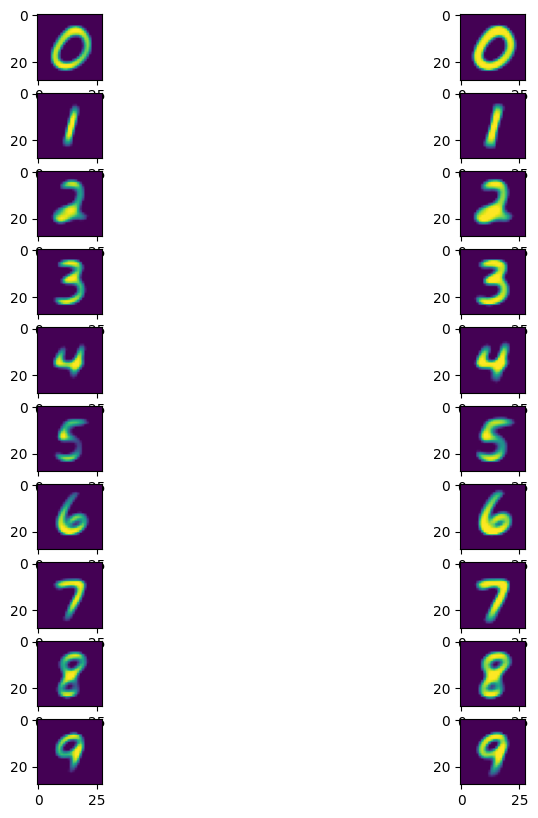

In [48]:
# "idealnie uśrednione liczby" i ich reprezentacja graficzna
def scale(x):
    return x.astype('float32')/255.0


def prep(x):
    x=scale(x)
    x=x.values.reshape(-1,28,28,1)
    return x


avg_numbers=[]
for num in range(10):
    for percentages in range(50,61,10):
        number =df_num.loc[df_num['label']==num].copy()
        
        number.pop('label')
        avg_number=[]
        for i in range(784):
            avg_number.append( number[f"{i}"].quantile(percentages/100))
    
        avg_numbers.append(avg_number)
    print(num,"ilość: ",len(number))
    
avg_numbers_df=pd.DataFrame(avg_numbers)
digits = prep(avg_numbers_df)

fig,axes = plt.subplots(10,2,figsize=(10,10))
for i,ax in enumerate(axes.flat):
    ax.imshow(digits[i])
plt.savefig('avg_num.png')


In [2]:
csv= numbers_csv.copy()
def shuffle(df):
    df=df.sample(frac=1).reset_index(drop=True)
    return df


def split(df, ratio):
    lengh = len(df)
    part =int(lengh*ratio)
    p1=df.iloc[0:part]
    p2=df.iloc[part:lengh]
    return p1,p2
    
  
def MaxMin(df_normalize):
    for column in df_normalize.columns:
        if column=='label':
            return df_normalize
        else:
            min= df_normalize[column].min()
            max=df_normalize[column].max()
            if max!=0:
                x_min =df_normalize[column] - min
                max_min=(max-min)
                df_normalize[column]=(x_min/max_min)
    

MaxMin(csv)
csv = shuffle(csv)
csv.head()
treningowy, walidacyjny=split(csv,0.7)





In [3]:
tren_cp=treningowy.copy()
wal_cp=walidacyjny.copy()

tren_labels = tren_cp.pop('label')
wal_labels = wal_cp.pop('label')



In [7]:
#kryterium mińkowskiego zrobione wykożystując funkcje pandas
def Minkowski(df,m,labels,k):
    df.pow(m)
    sum = df.sum(axis=1)
    sum = sum.pow(1/m)
    res=pd.concat([sum,labels],axis=1,join="inner")
    #k najbliższych sąsiadów
    resSort = res.sort_values(by=[0])
    return resSort.iloc[:k]

def predict(kNeigh):
    l=len(kNeigh)
    pred= kNeigh.groupby(['label']).size().reset_index().rename(columns={0:'dupe'})
    kNeigh.head()
    
    if len(pred)!=1:
        pred =pred.sort_values(by=["dupe"],ascending=False) 
        if pred.iloc[0,1]>l/2:
            
            return(pred.iloc[0,0])
        else:
            if pred.iloc[0,1]>pred.iloc[1,1]:
                return(pred.iloc[0,0])
            elif pred.iloc[0,1]>pred.iloc[len(pred)-1,1]:
                return pred.iloc[rd.randint(0,len(pred)-2),0]
            else:
                return pred.iloc[rd.randint(0,len(pred)-1),0]
    return pred.iloc[0,0]

def confusionMatrix(wyniki, predykcja ):
    errors=[]
    confMatrix =[[0]*10 for i in range(10)]
    for i in range(len(wyniki)):
        confMatrix[wyniki[i]][predykcja.iloc[i]]+=1
        if wyniki[i]!=predykcja.iloc[i]:
            errors.append(i)
    return confMatrix,errors
def KNN(zTren,zWal,k,m,zTrenLabels,zWalLabels):
    wyniki=[]
    for i in range(len(zWal)):
        roznica=abs(zTren-zWal.iloc[i])#obliczanie różnicy między elementem x w zbiorze walidacyjnym a całością zbioru treningowego
        kNeigh = Minkowski(roznica,m,zTrenLabels,k)
        wyniki.append(predict(kNeigh))
        if i %1000==0:
            print( i)
    confMatrix,errors=confusionMatrix(wyniki,zWalLabels)
    return confMatrix,errors
        

#to do
#rozwiązywanie przypadków granicznych >porównanie wartości przewidywanych z rzeczywistymi w postaci tabeli 
matrix=[[]]
matrix,errors=KNN(tren_cp,wal_cp,3,2,tren_labels,wal_labels)
for i in range(10):
    print(matrix[i])
print(errors)

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
[1744, 0, 15, 1, 2, 4, 8, 0, 8, 6]
[1, 2021, 29, 7, 21, 6, 7, 24, 36, 4]
[4, 3, 1690, 15, 0, 1, 0, 5, 6, 1]
[0, 0, 6, 1735, 0, 32, 0, 2, 23, 4]
[0, 3, 0, 0, 1677, 5, 1, 5, 8, 21]
[4, 0, 4, 17, 0, 1544, 6, 0, 33, 7]
[5, 0, 5, 0, 3, 28, 1762, 0, 15, 2]
[0, 4, 33, 18, 4, 2, 0, 1856, 5, 29]
[2, 0, 7, 12, 0, 2, 0, 1, 1594, 3]
[3, 2, 3, 7, 42, 4, 0, 14, 33, 1694]
[31, 39, 45, 118, 123, 140, 250, 275, 349, 378, 399, 426, 443, 495, 514, 523, 556, 562, 595, 636, 658, 670, 674, 691, 743, 761, 762, 765, 801, 822, 842, 857, 865, 866, 908, 921, 957, 966, 971, 990, 999, 1022, 1081, 1111, 1116, 1165, 1178, 1208, 1213, 1217, 1241, 1266, 1267, 1283, 1356, 1392, 1395, 1403, 1424, 1425, 1438, 1453, 1485, 1503, 1533, 1549, 1602, 1644, 1662, 1663, 1672, 1726, 1747, 1761, 1802, 1813, 1840, 1875, 1913, 1972, 2024, 2038, 2056, 2110, 2135, 2141, 2164, 2218, 2241, 2245, 2274, 2369, 2426, 2427, 2446, 2451, 2470, 2471, 

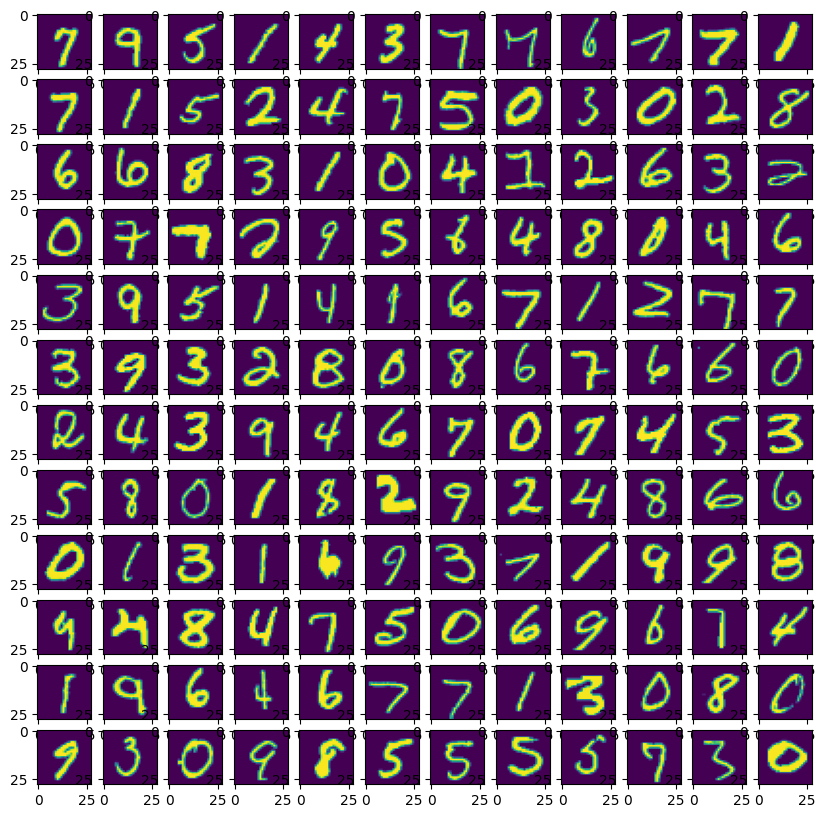

In [45]:
def scale(x):
    return x.astype('float32')/255.0
def prep(x):
    x=scale(x)
    x=x.values.reshape(-1,28,28,1)
    return x 
avg_numbers_df=wal_cp.copy()
digits = prep(avg_numbers_df)

fig,axes = plt.subplots(12,12,figsize=(10,10))
for i,ax in enumerate(axes.flat):
    ax.imshow(digits[i])
plt.savefig('number_representation.png')


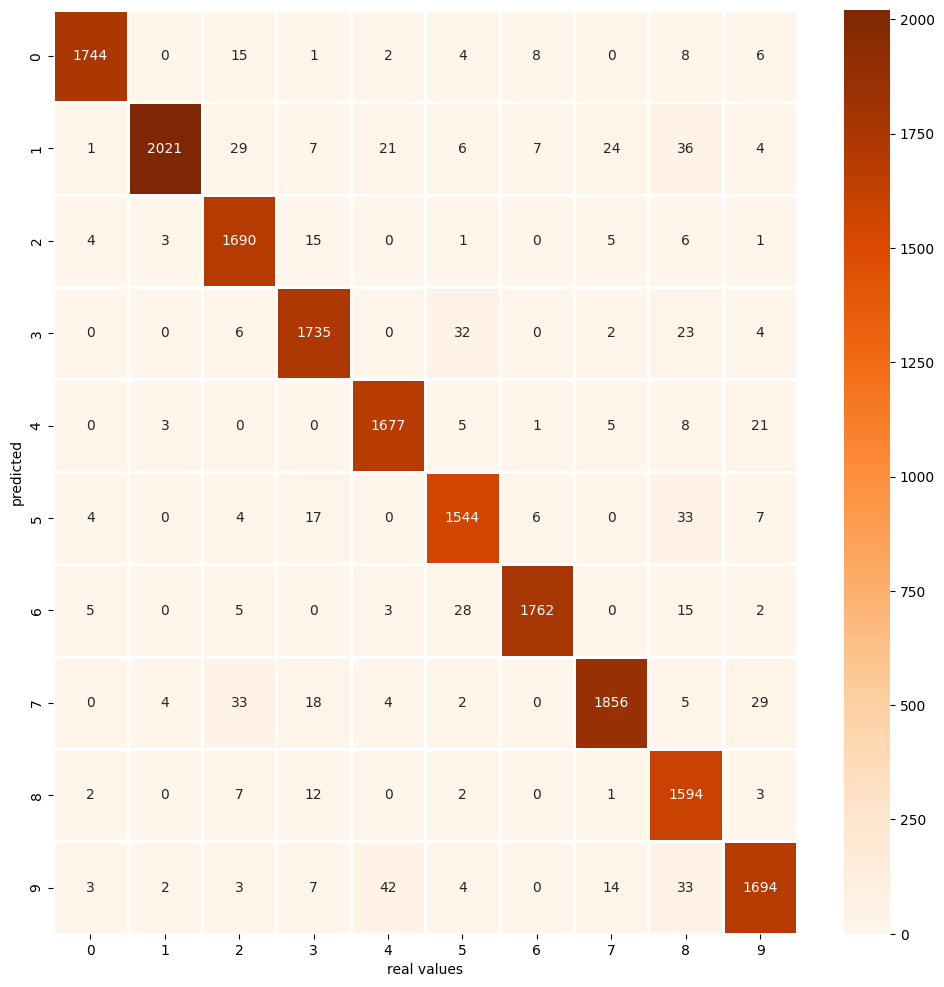

In [28]:
fig,ax =plt.subplots(figsize=(12,12))
plot = sns.heatmap(matrix,cmap="Oranges",annot=True,linewidths=1,ax=ax,fmt=".0f")
plot.set(ylabel="predicted",xlabel="real values")
plt.savefig('confusionMatrix.png')

0.9620555555555556


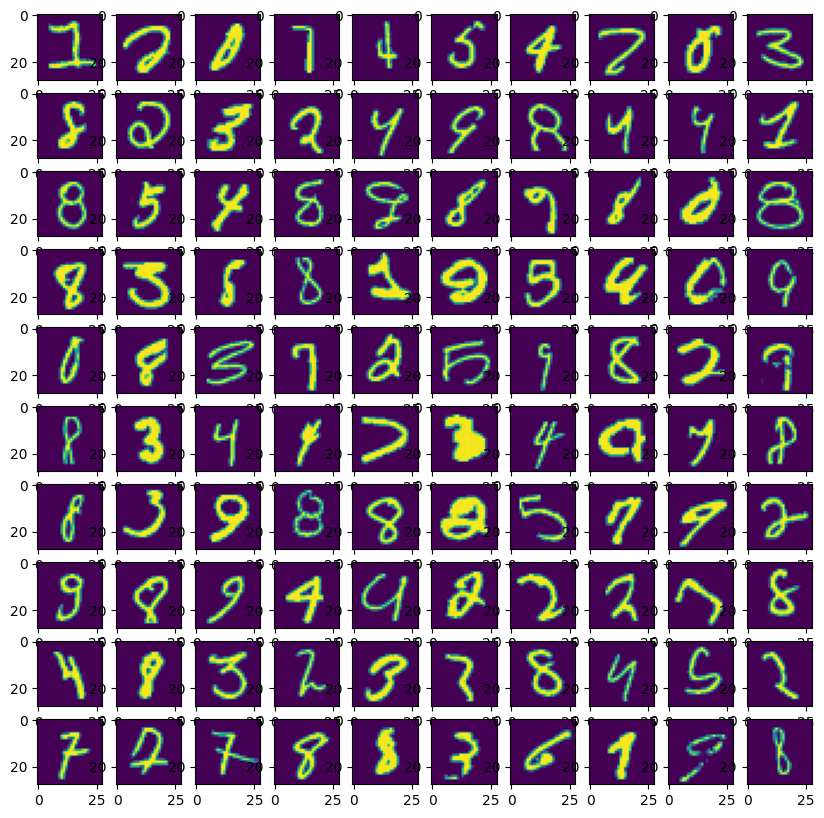

In [47]:
accuracy = ((18000-len(errors))/18000)
print(accuracy)
error_num=wal_cp.copy()
digits = prep(error_num.iloc[errors])

fig,axes = plt.subplots(10,10,figsize=(10,10))
for i,ax in enumerate(axes.flat):
    ax.imshow(digits[i])
plt.savefig('error representation.png')